In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-1gozf0oy because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


### Physical samples

In [2]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen/Ntuples/Combined_GenInfo_only_A_2Tau_m3p6To18_pT30To300_v2_unbiased.root")
RHTree = file["fevt/RHTree"]

In [17]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

In [18]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

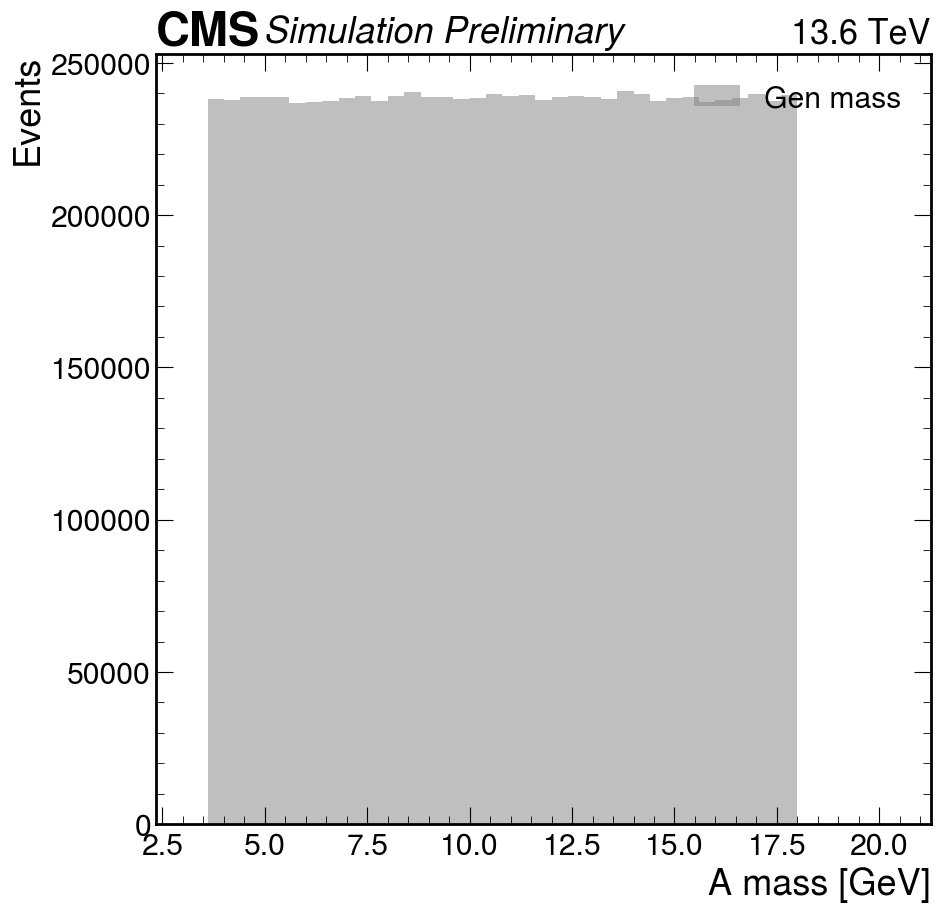

Totgal entry 8589071


In [19]:
# GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(10,10))
# plt.hist(GenA1_invariant,bins=np.arange(3.2,20.5,0.4),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenA1,bins=np.arange(3.2,20.5,0.4),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="Gen mass")
# plt.xticks(np.arange(3.6,21,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("A mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
plt.show()
print("Totgal entry", len(GenA1))

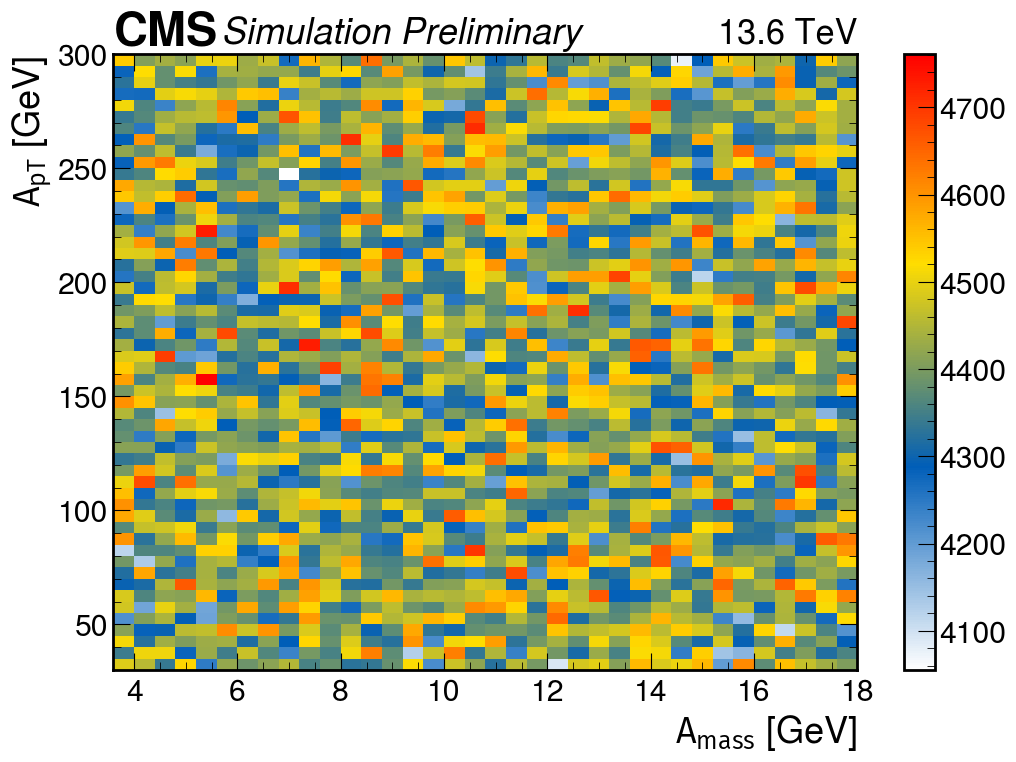

In [20]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
counts, xedges, yedges, _ = plt.hist2d(GenA1, A1_pt, bins=[np.arange(3.6,18.1, .4), np.arange(30,301,5)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 
# print(counts)

In [21]:
outlist = counts.flatten()
print("min---", min(outlist), "max---", max(outlist))
outstr = ""
# for i in range(len(outlist)):
for i in range(len(np.arange(4,18.1,0.4))*len(np.arange(35,301,5))):
  if (i%len(np.arange(35,301,5)) == 0) and (i != 0):
    outstr += '\n'
  outstr += str(int(outlist[i])) + ', '

print(outstr)

min--- 4055.0 max--- 4761.0
4489, 4342, 4511, 4411, 4215, 4478, 4484, 4296, 4318, 4394, 4118, 4601, 4368, 4578, 4602, 4552, 4503, 4395, 4334, 4413, 4379, 4367, 4450, 4603, 4396, 4585, 4540, 4487, 4437, 4329, 4444, 4391, 4341, 4469, 4254, 4323, 4492, 4478, 4436, 4277, 4212, 4545, 4578, 4337, 4283, 4420, 4284, 4359, 4338, 4510, 4270, 4326, 4281, 4539, 
4455, 4506, 4323, 4283, 4406, 4186, 4361, 4313, 4580, 4132, 4361, 4328, 4466, 4493, 4336, 4273, 4676, 4589, 4346, 4411, 4247, 4388, 4360, 4547, 4472, 4356, 4449, 4492, 4300, 4373, 4373, 4403, 4524, 4271, 4352, 4410, 4490, 4598, 4240, 4356, 4573, 4465, 4453, 4361, 4594, 4379, 4599, 4253, 4366, 4361, 4271, 4497, 4521, 4406, 
4337, 4507, 4433, 4295, 4444, 4500, 4419, 4449, 4327, 4424, 4359, 4424, 4476, 4370, 4356, 4422, 4357, 4477, 4465, 4295, 4410, 4579, 4148, 4412, 4445, 4437, 4366, 4694, 4356, 4572, 4199, 4462, 4519, 4461, 4460, 4298, 4579, 4348, 4421, 4263, 4290, 4536, 4444, 4522, 4628, 4462, 4365, 4468, 4433, 4236, 4496, 4378, 4378, 4436

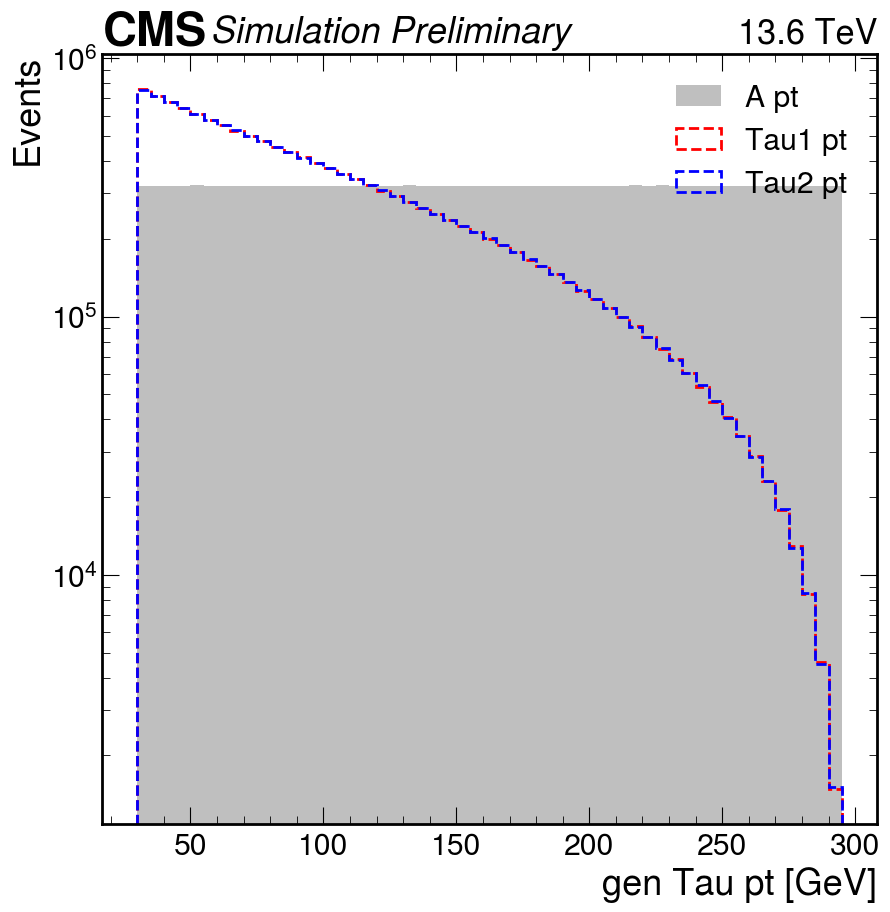

In [6]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']


fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_pt,bins=np.arange(30,300,5),color='grey',alpha=0.5,label="A pt",log=True)
plt.hist(Tau1_pt,bins=np.arange(30,300,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,300,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt")

# plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

In [10]:
print(len(np.arange(4,18.1,0.4)), len(np.arange(35,201,5)))

36 34


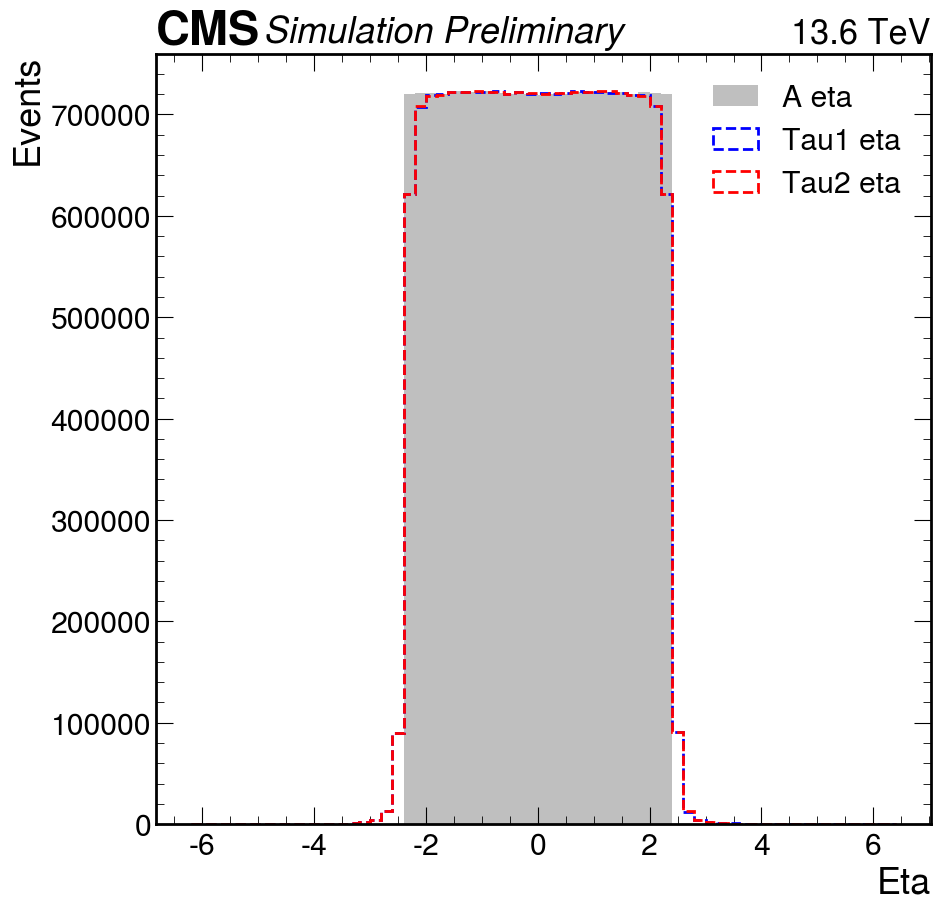

In [10]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
Tau2_eta = RHTree.arrays(["Tau2_eta"],"Tau2_eta > -111",library="pd")['Tau2_eta']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_eta,bins=np.arange(-6.2,6.4,.2),color='grey',alpha=0.5,label="A eta")
plt.hist(Tau1_eta,bins=np.arange(-6.2,6.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 eta")
plt.hist(Tau2_eta,bins=np.arange(-6.2,6.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 eta")
# plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("Eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

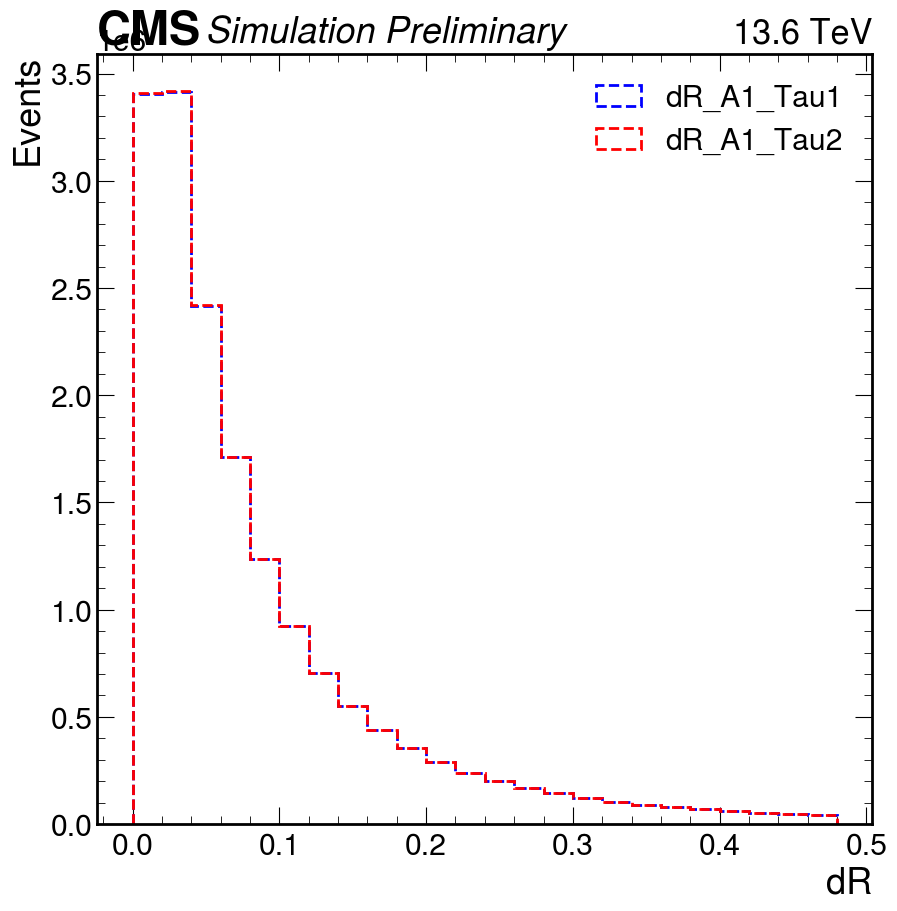

In [11]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau2 = RHTree.arrays(["dR_A1_Tau2"],"dR_A1_Tau2 > -111",library="pd")['dR_A1_Tau2']

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_A1_Tau1,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A1_Tau1")
plt.hist(dR_A1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_A1_Tau2")

# plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

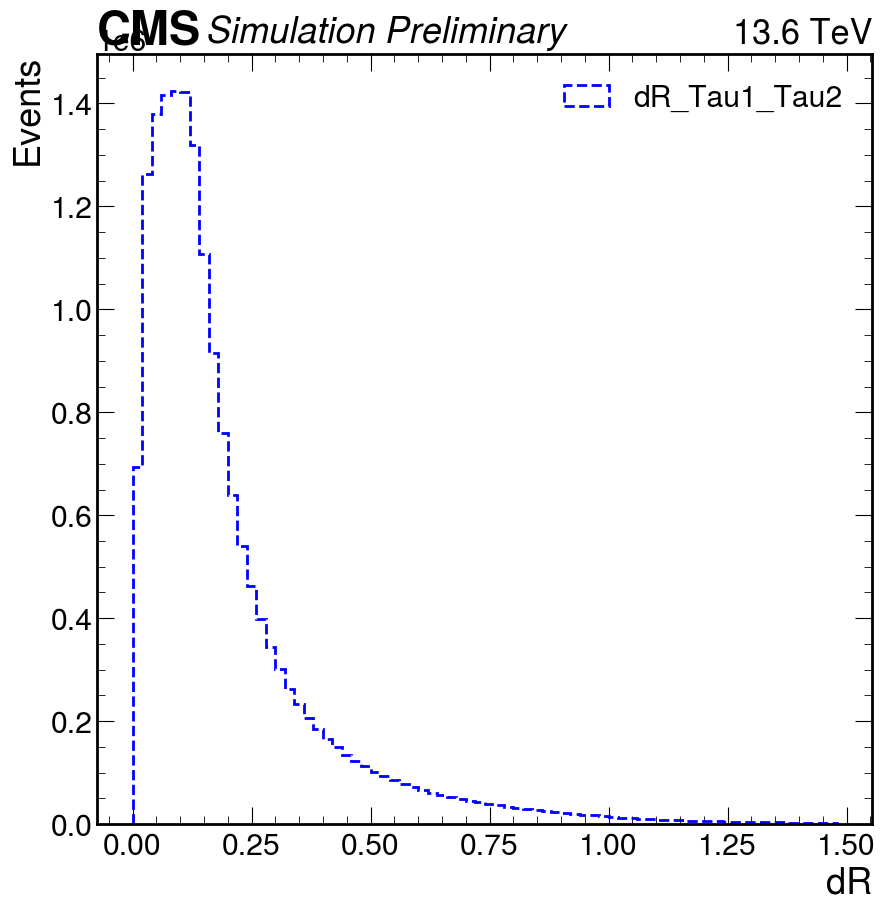

In [12]:
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_Tau1_Tau2")

# plt.xticks(np.arange(0,1,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

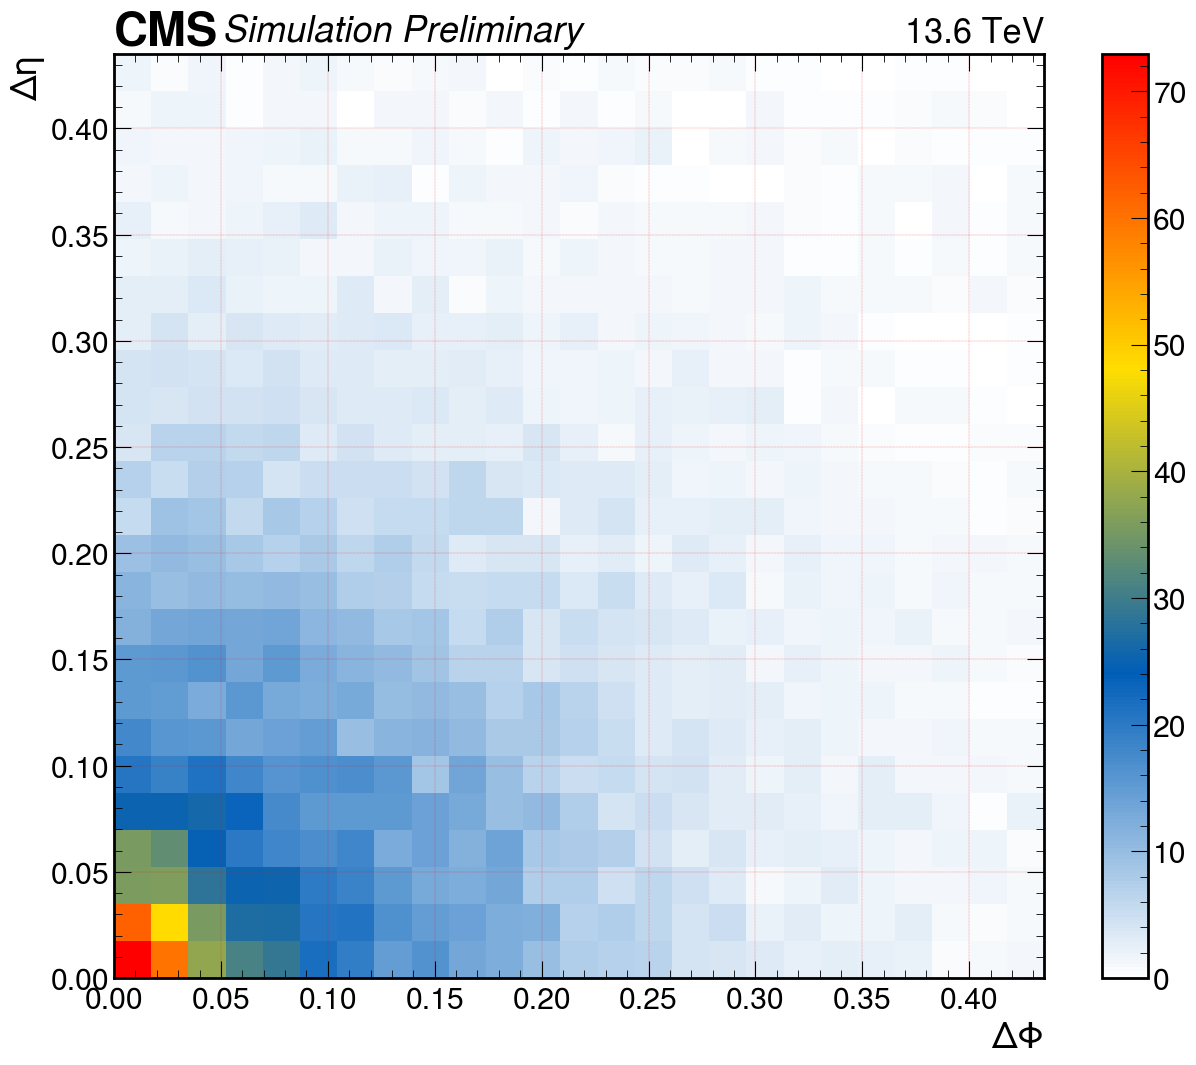

In [44]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
fig, ax = plt.subplots(figsize=(15,12))
plt.hist2d( Tau1_Tau2_dphi, Tau1_Tau2_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
plt.colorbar()
# plt.xticks(np.arange(0,.44,0.0174),size=5)
# plt.yticks(np.arange(0,.44,0.0174),size=12)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau1_Tau2_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

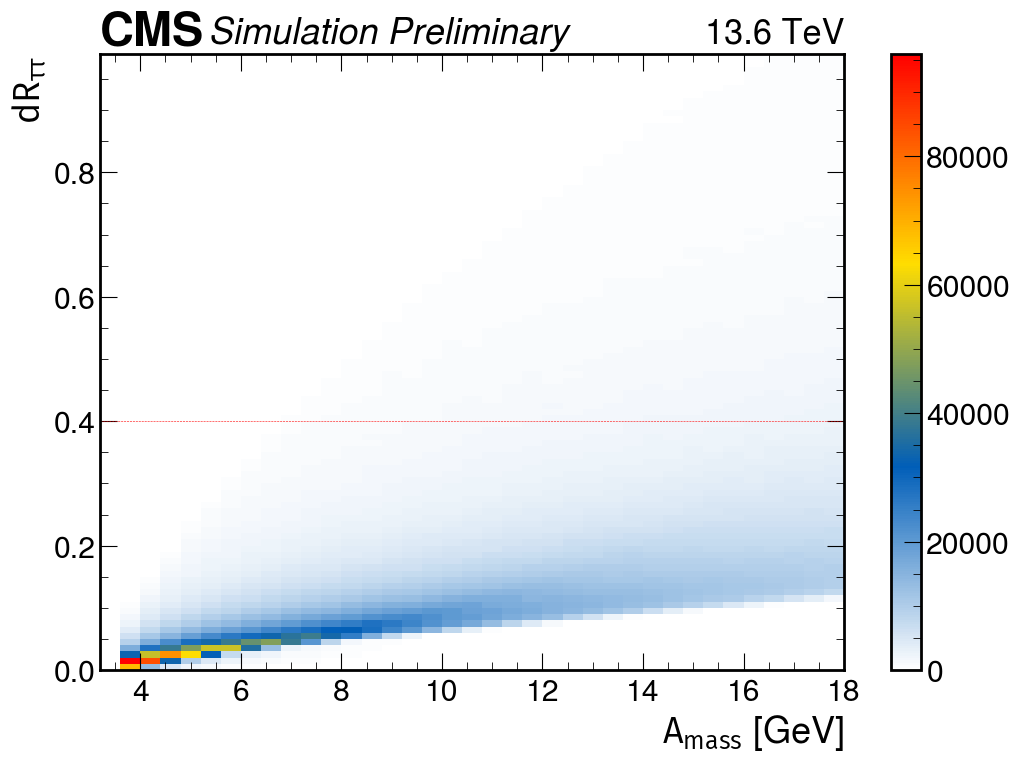

In [22]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
norm = mcolors.TwoSlopeNorm(vmin=0, vmax = 400, vcenter=200)
plt.hist2d(GenA1, dR_Tau1_Tau2, bins=[np.arange(3.2,18.1, .4), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}} $ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

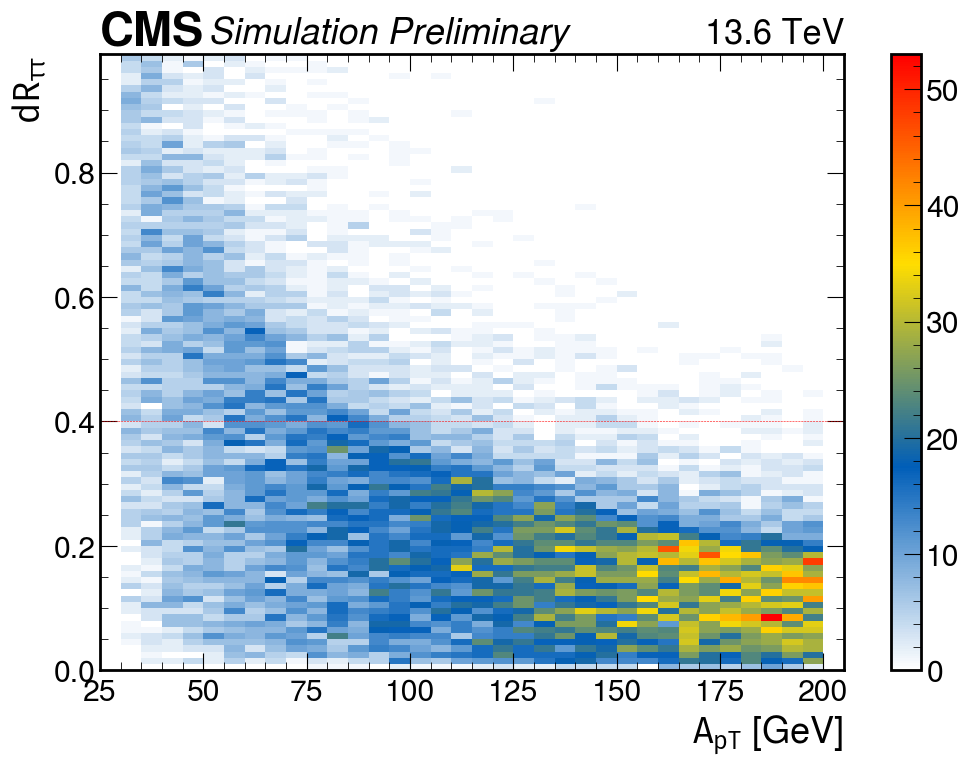

In [46]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_pt, dR_Tau1_Tau2, bins=[np.arange(25,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

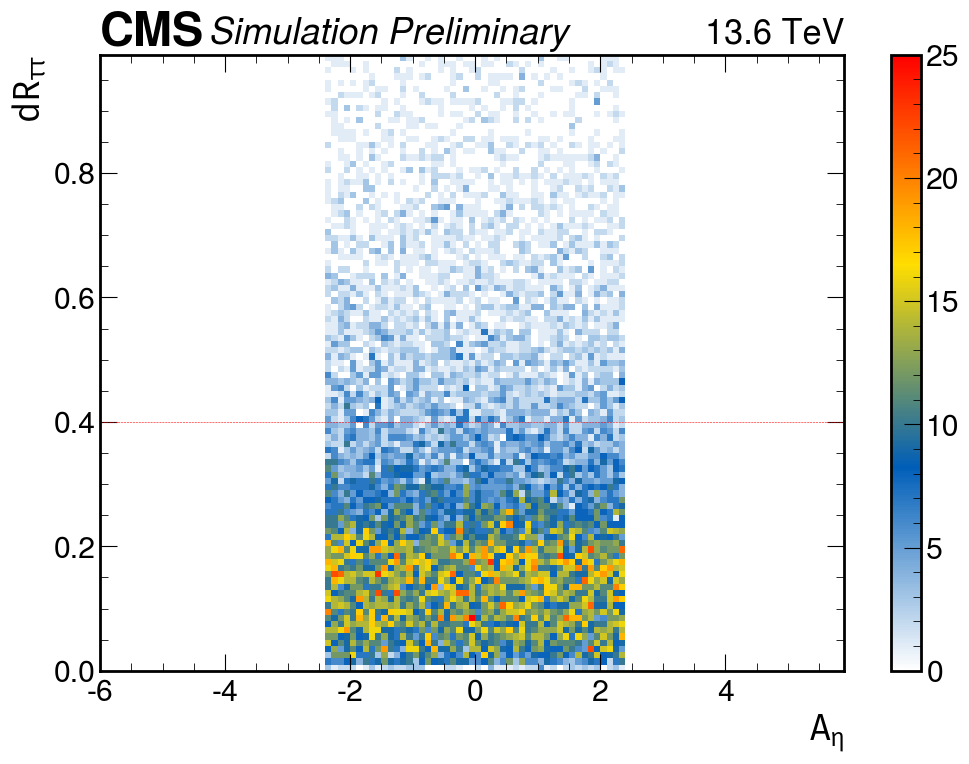

In [47]:
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_eta, dR_Tau1_Tau2, bins=[np.arange(-6,6, .1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{\eta}}$')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

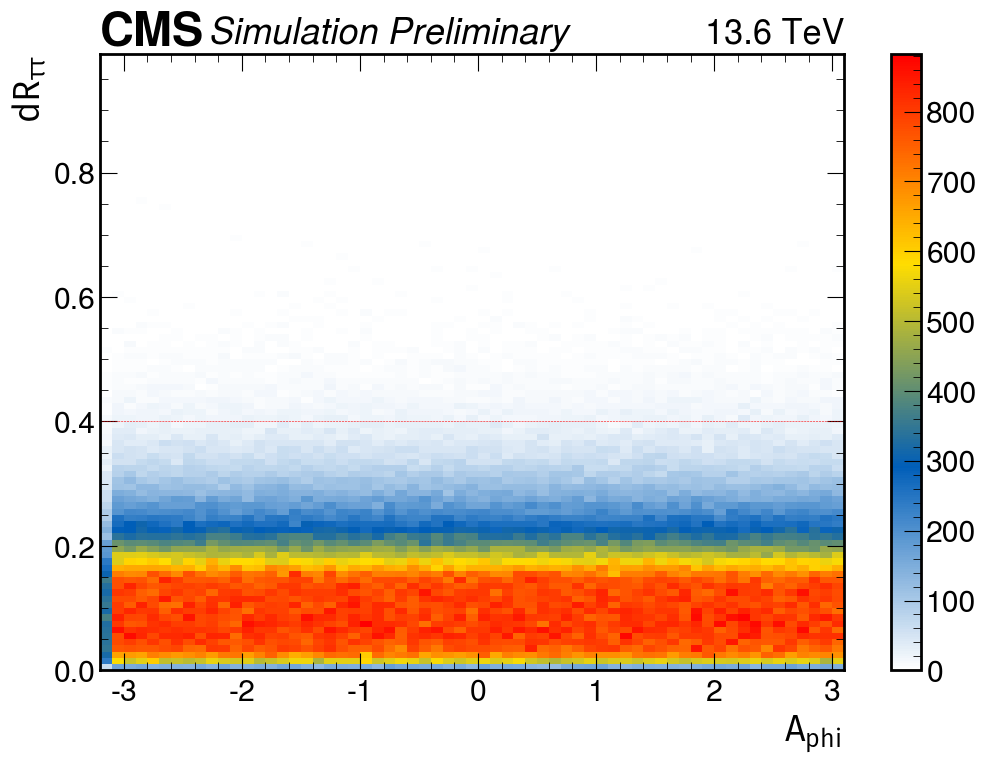

In [25]:
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_phi, dR_Tau1_Tau2, bins=[np.arange(-3.2,3.2, .1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{phi}}$ ')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

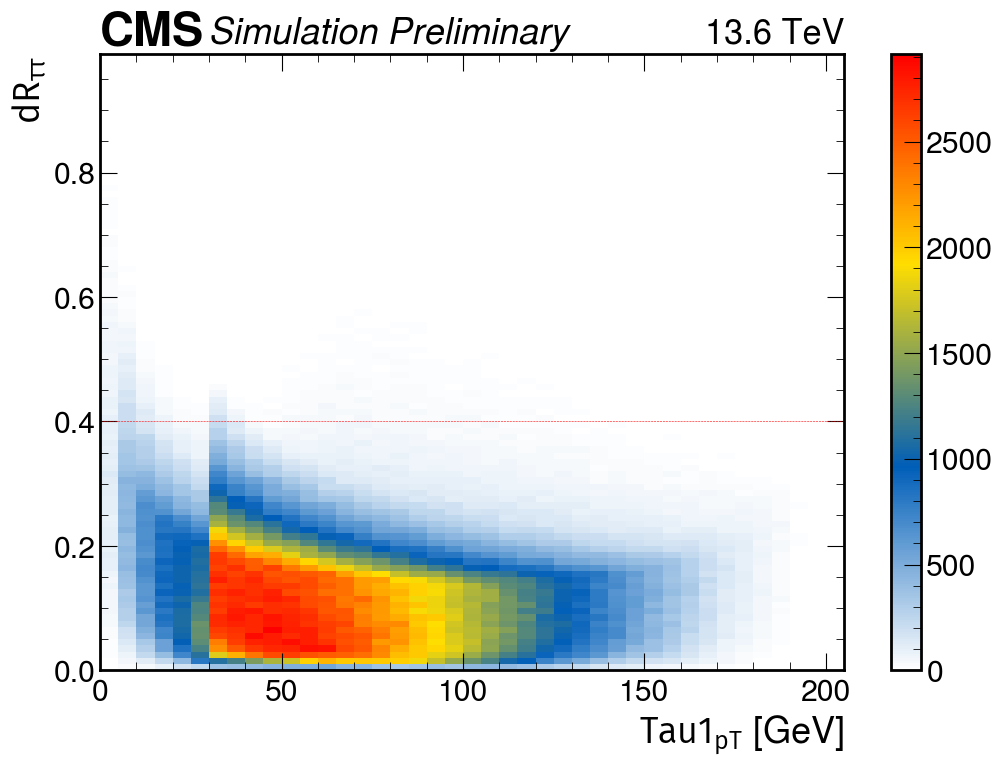

In [26]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_pt, dR_Tau1_Tau2, bins=[np.arange(0,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

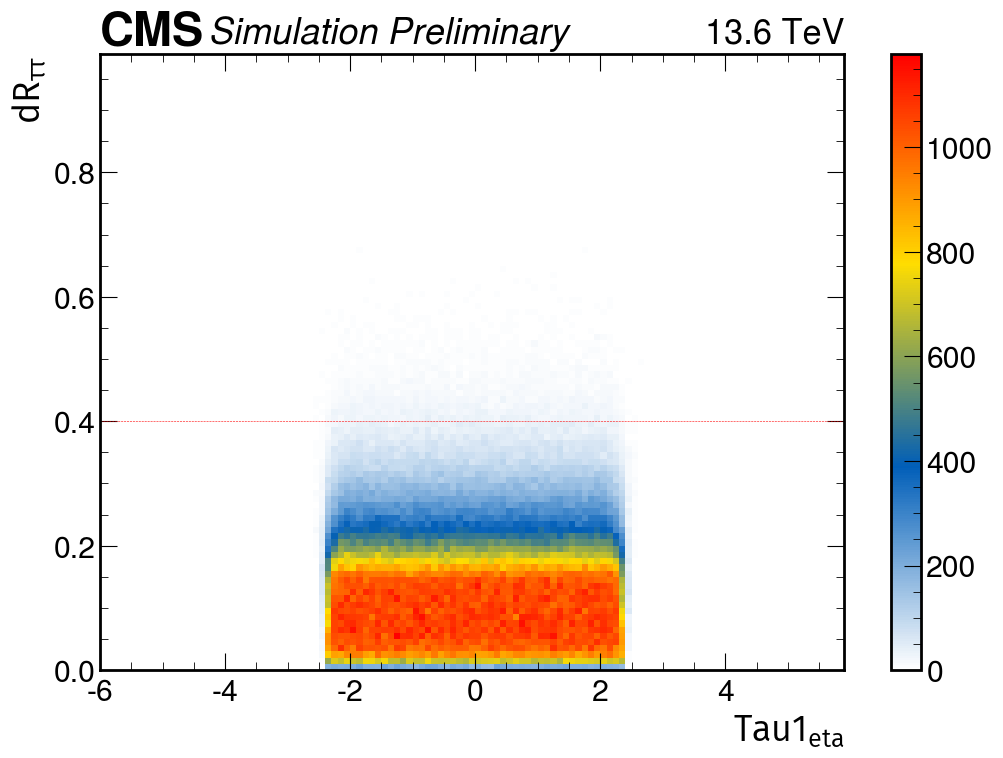

In [27]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_eta, dR_Tau1_Tau2, bins=[np.arange(-6,6, 0.1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{eta}}$')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

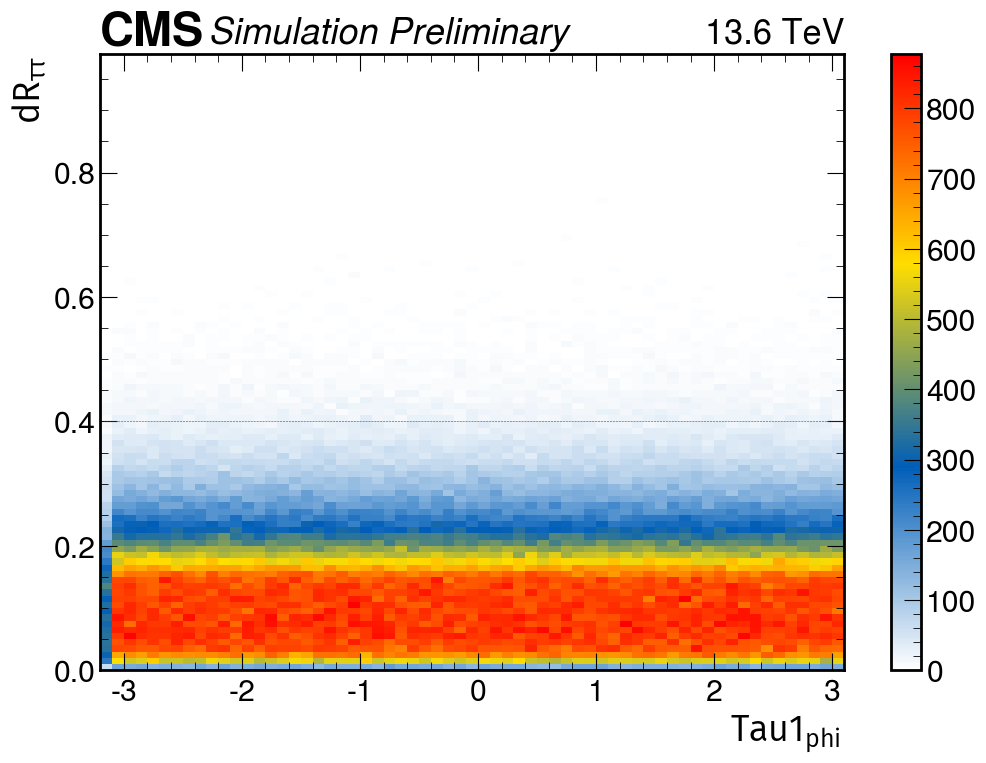

In [28]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_phi, dR_Tau1_Tau2, bins=[np.arange(-3.2,3.2, 0.1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{phi}}$ ')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

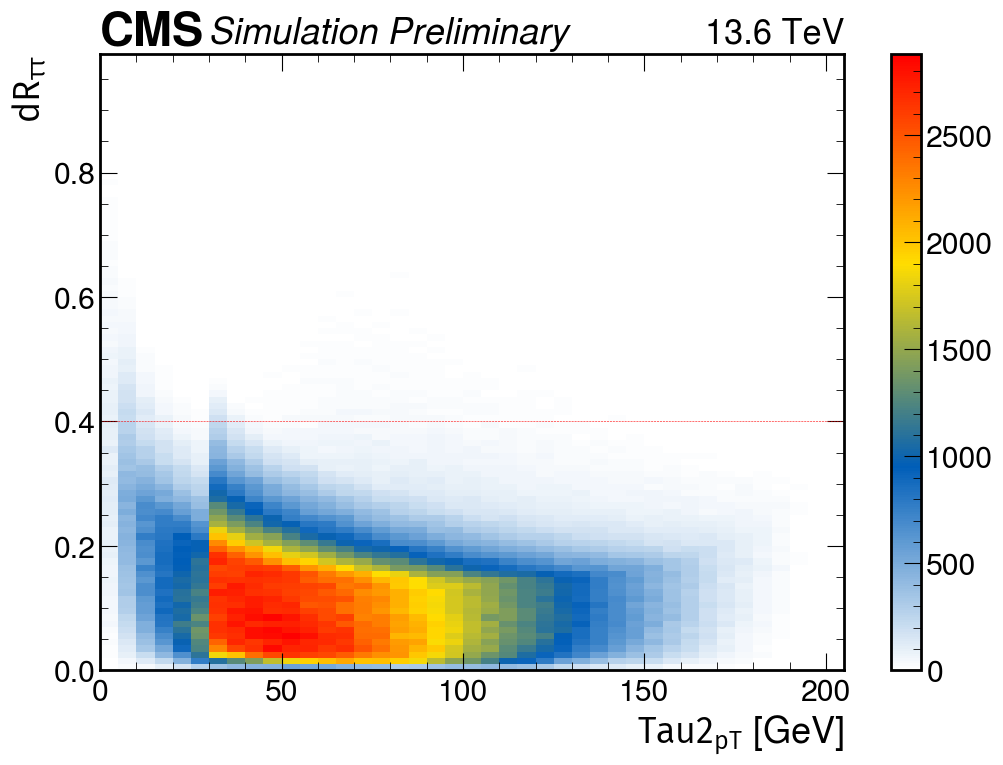

In [29]:
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau2_pt, dR_Tau1_Tau2, bins=[np.arange(0,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau2_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

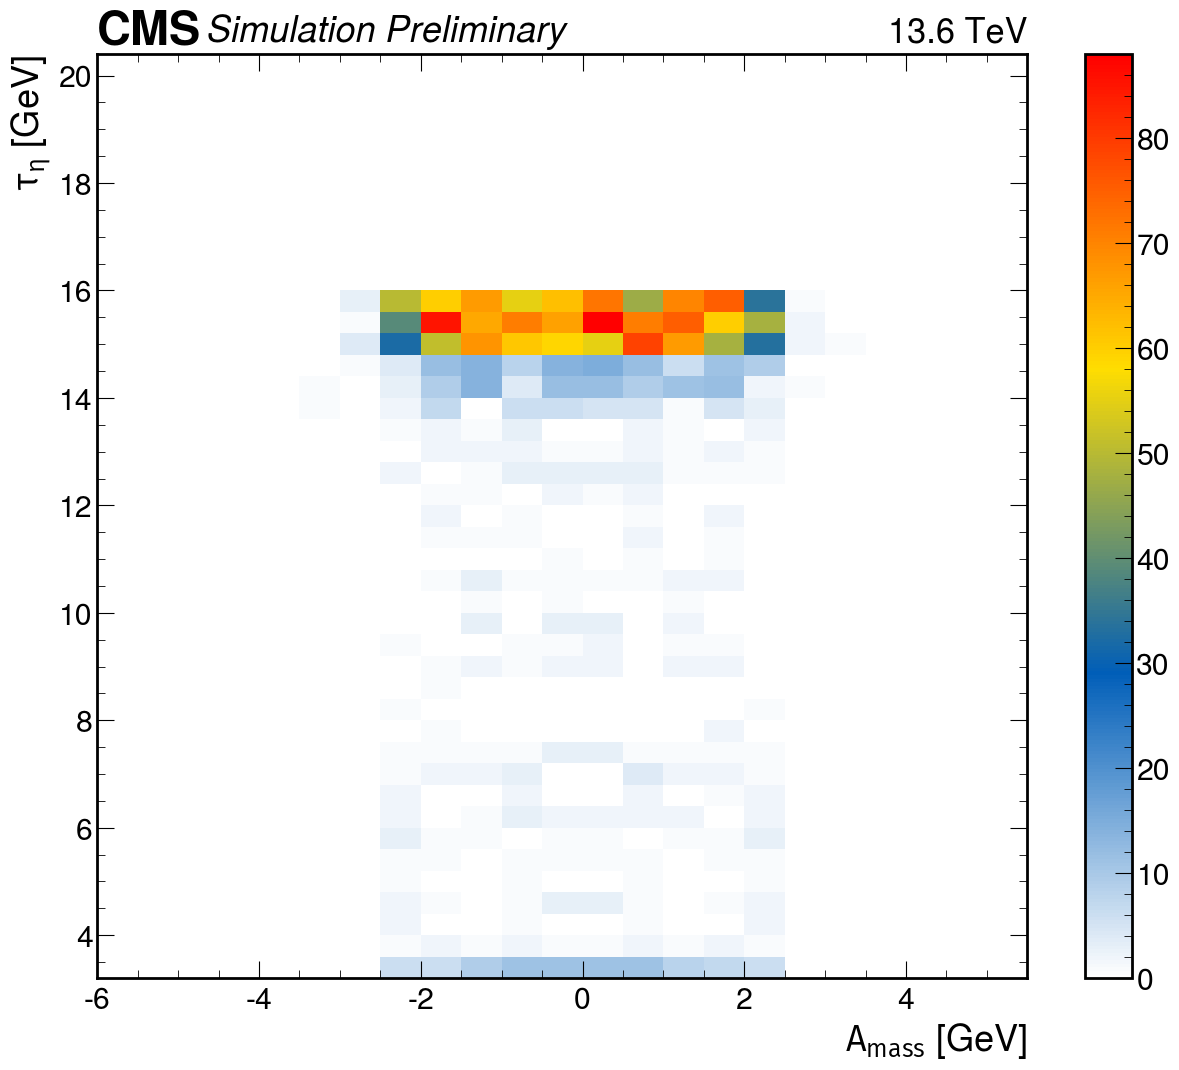

In [41]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']

fig, ax = plt.subplots(figsize=(15,12), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_eta, GenA1,  bins=[ np.arange(-6,6,0.5), np.arange(3.2,20.5, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{\tau_{\eta}}$ [GeV]')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

# Unphysical samples

In [27]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen/Ntuples/Combined_GenInfo_only_A_2Tau_m1p6To3p6_pT30To60_v4_unbiased.root")
RHTree = file["fevt/RHTree"]

In [28]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

In [29]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

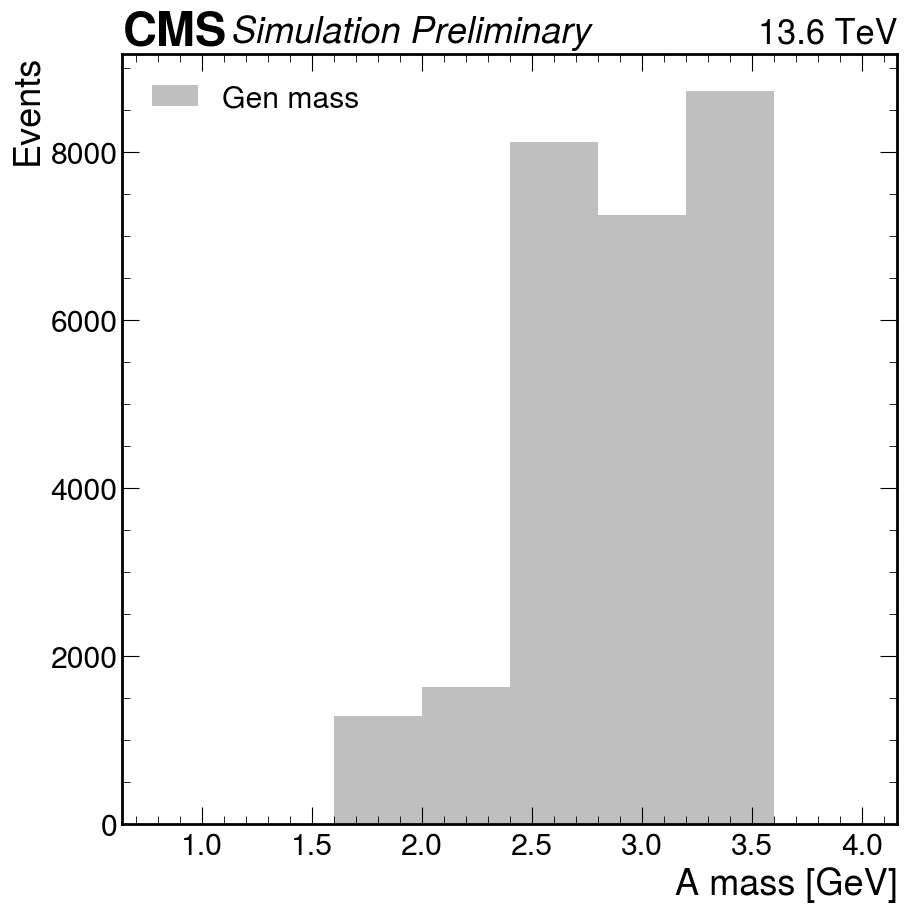

27014

In [30]:
# GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(10,10))
# plt.hist(GenA1_invariant,bins=np.arange(3.2,20.5,0.4),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenA1,bins=np.arange(0.8,4.1,0.4),linestyle='--',linewidth=2, color='grey',alpha=0.5,label="Gen mass")
# plt.xticks(np.arange(3.6,21,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("A mass [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=100, facecolor = "w")
plt.show()
len(GenA1)

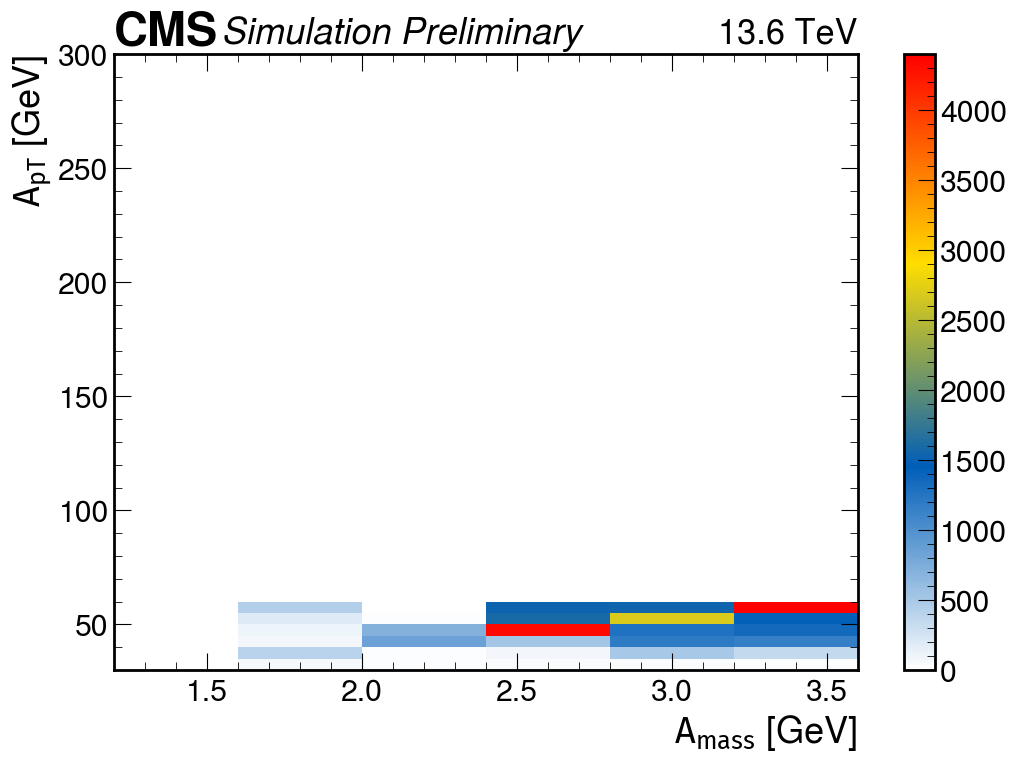

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [  66.  410.   70.  114.  194.  434.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.]
 [  20.   20.  856.  708.   20.   12.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.   

In [31]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
counts, xedges, yedges, _ = plt.hist2d(GenA1, A1_pt, bins=[np.arange(1.2,3.7, .4), np.arange(30,301,5)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 
print(counts)

In [8]:
outlist = counts.flatten()
print("min---", min(outlist), "max---", max(outlist))
outstr = ""
# for i in range(len(outlist)):
for i in range(len(np.arange(1.6,3.7,0.4))*len(np.arange(35,301,5))):
  if (i%len(np.arange(35,301,5)) == 0) and (i != 0):
    outstr += '\n'
  outstr += str(int(outlist[i])) + ', '

print(outstr)

min--- 324.0 max--- 43228.0
6910, 6620, 7058, 6600, 6434, 6772, 6690, 6510, 6580, 6812, 6534, 6840, 6470, 6640, 6828, 6652, 6496, 6948, 6324, 6808, 6550, 6824, 6538, 6586, 6398, 6770, 6522, 6682, 6560, 6492, 6328, 6688, 6656, 6892, 6524, 6540, 6720, 6890, 6784, 6762, 6532, 6778, 6688, 6968, 6554, 6930, 6500, 6598, 6720, 6696, 6554, 6418, 6682, 6850, 
1768, 12438, 10000, 8758, 6930, 7000, 6592, 6982, 6566, 6690, 6712, 6798, 6828, 6682, 6676, 7048, 6820, 6608, 6652, 6676, 6556, 6564, 6678, 6574, 6546, 6790, 6838, 6498, 6314, 6852, 6636, 6262, 7000, 7018, 6686, 6774, 6448, 6598, 6584, 6428, 6498, 6644, 6608, 6498, 6614, 6674, 6808, 6544, 6996, 6722, 6440, 6674, 6458, 6634, 
324, 510, 26770, 43228, 33202, 13494, 7742, 7038, 6754, 6508, 6386, 6764, 6720, 6622, 6798, 6472, 6558, 6520, 6678, 6708, 6836, 6874, 6540, 6682, 6718, 6220, 6530, 6552, 6700, 6374, 6896, 6524, 6792, 6638, 6666, 6604, 6438, 6694, 6710, 6304, 6594, 6528, 6726, 6864, 6944, 6616, 6592, 6782, 6786, 6618, 6792, 6684, 6682, 

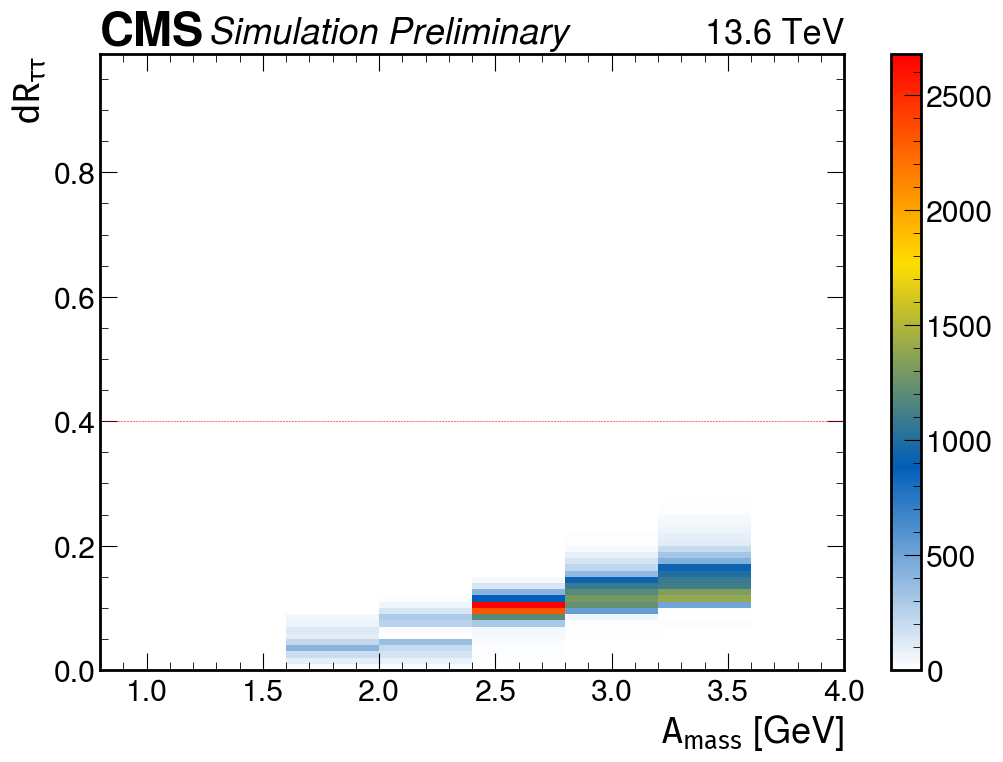

In [9]:
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(GenA1, dR_Tau1_Tau2, bins=[np.arange(0.8,4.1, .4), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}} $ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

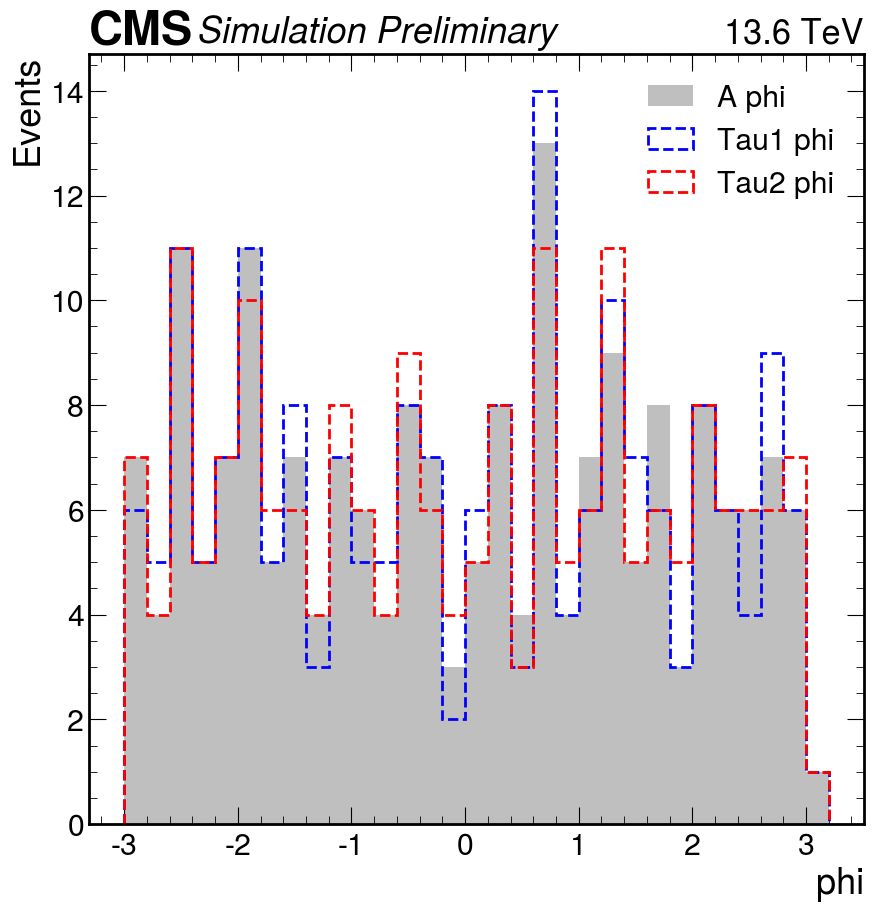

In [91]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
Tau2_phi = RHTree.arrays(["Tau2_phi"],"Tau2_phi > -111",library="pd")['Tau2_phi']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_phi,bins=np.arange(-3.0,3.4,.2),color='grey',alpha=0.5,label="A phi")
plt.hist(Tau1_phi,bins=np.arange(-3.0,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 phi")
plt.hist(Tau2_phi,bins=np.arange(-3.0,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 phi")
# plt.xticks(np.arange(-3.0,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

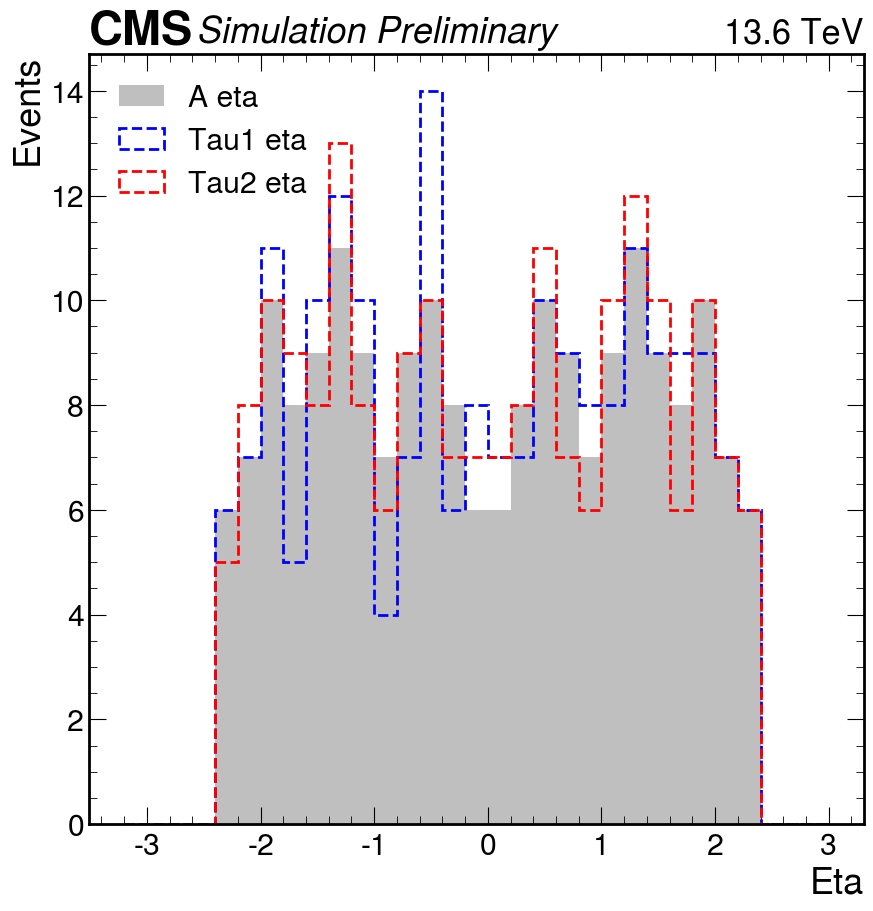

In [92]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
Tau2_eta = RHTree.arrays(["Tau2_eta"],"Tau2_eta > -111",library="pd")['Tau2_eta']
fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_eta,bins=np.arange(-3.2,3.2,.2),color='grey',alpha=0.5,label="A eta")
plt.hist(Tau1_eta,bins=np.arange(-3.2,3.2,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 eta")
plt.hist(Tau2_eta,bins=np.arange(-3.2,3.2,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 eta")
# plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("Eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

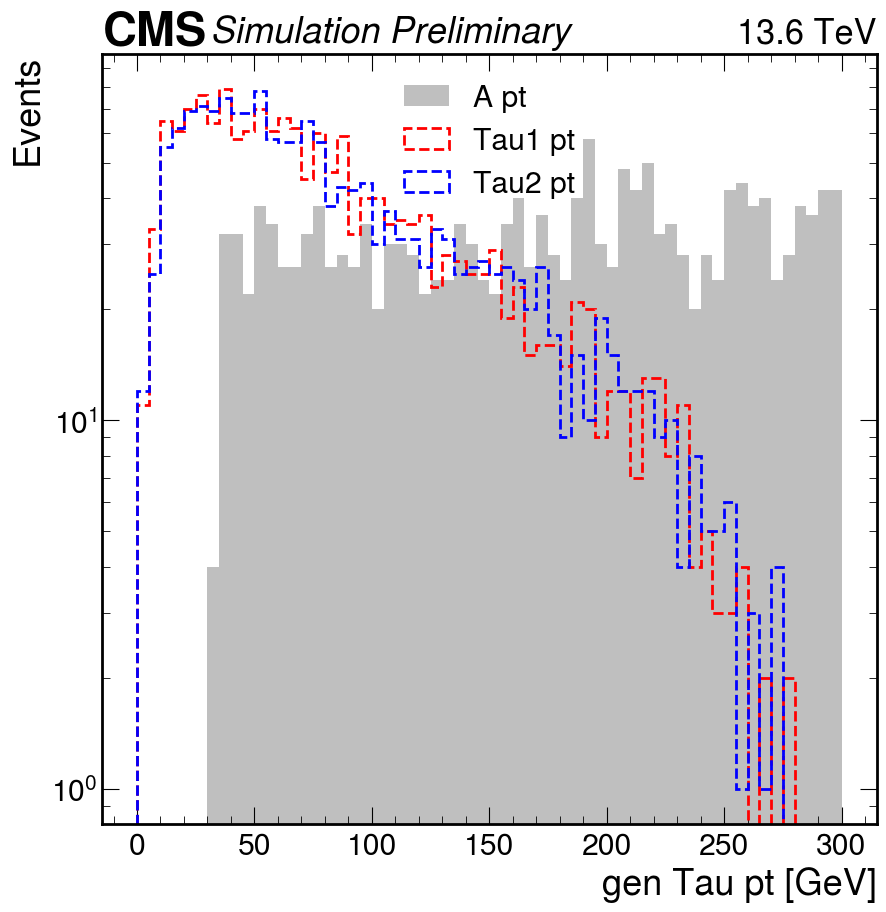

In [16]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']


fig, ax = plt.subplots(figsize=(10,10))
plt.hist(A1_pt,bins=np.arange(0,301,5),color='grey',alpha=0.5,label="A pt",log=True)
plt.hist(Tau1_pt,bins=np.arange(0,301,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(0,301,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt")

# plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

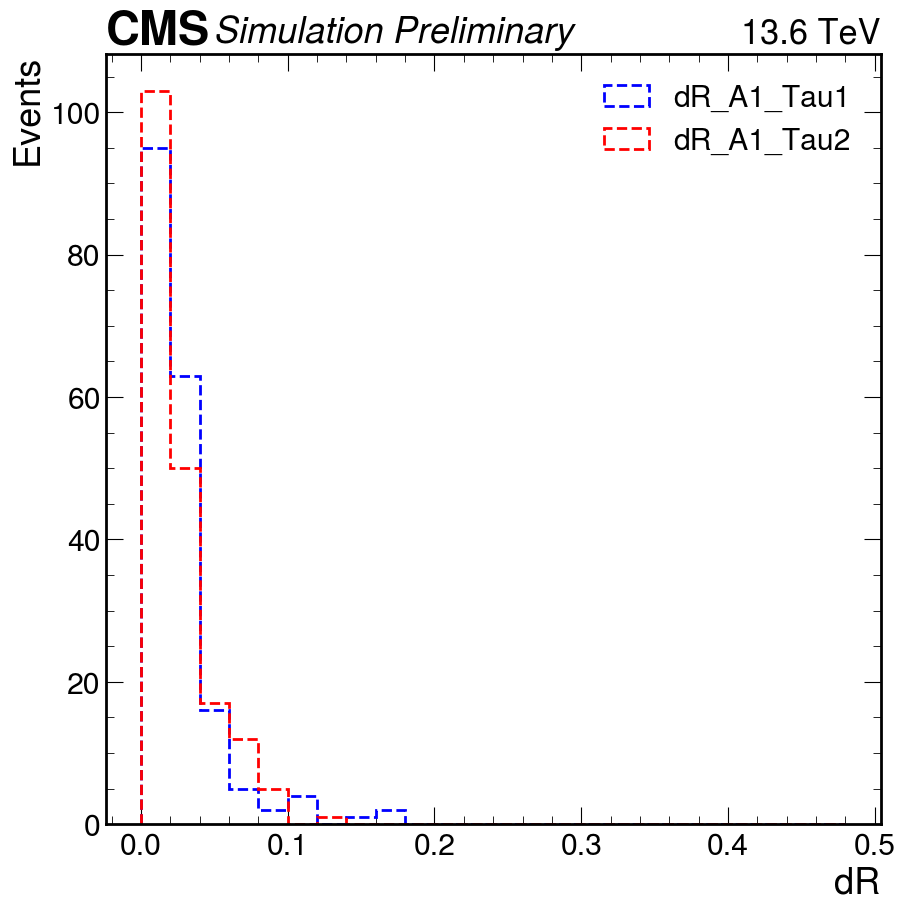

In [84]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau2 = RHTree.arrays(["dR_A1_Tau2"],"dR_A1_Tau2 > -111",library="pd")['dR_A1_Tau2']

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_A1_Tau1,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A1_Tau1")
plt.hist(dR_A1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_A1_Tau2")

# plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

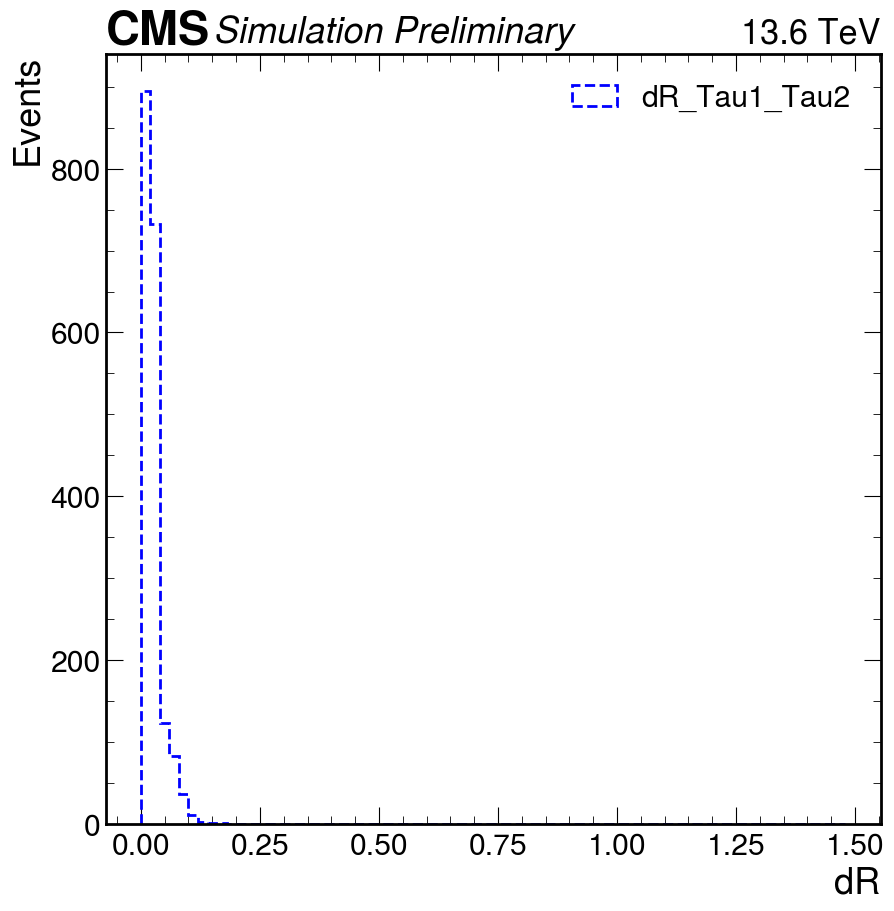

In [10]:
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(10,10))
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,1.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_Tau1_Tau2")

# plt.xticks(np.arange(0,1,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

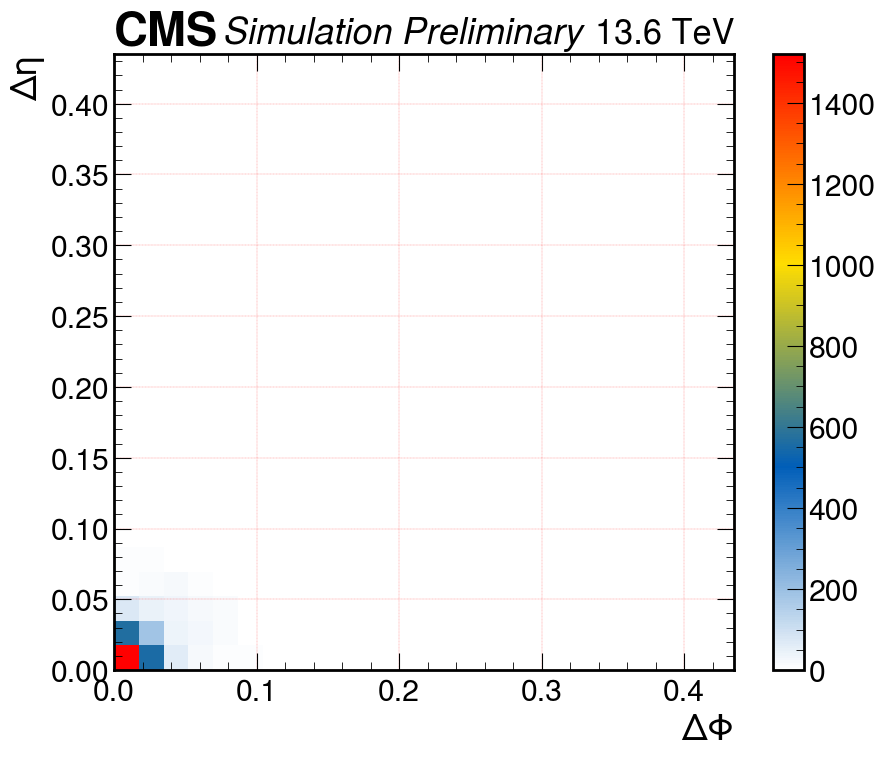

In [11]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
fig, ax = plt.subplots(figsize=(10,8))
plt.hist2d( Tau1_Tau2_dphi, Tau1_Tau2_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
plt.colorbar()
# plt.xticks(np.arange(0,.44,0.0174),size=5)
# plt.yticks(np.arange(0,.44,0.0174),size=12)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau1_Tau2_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

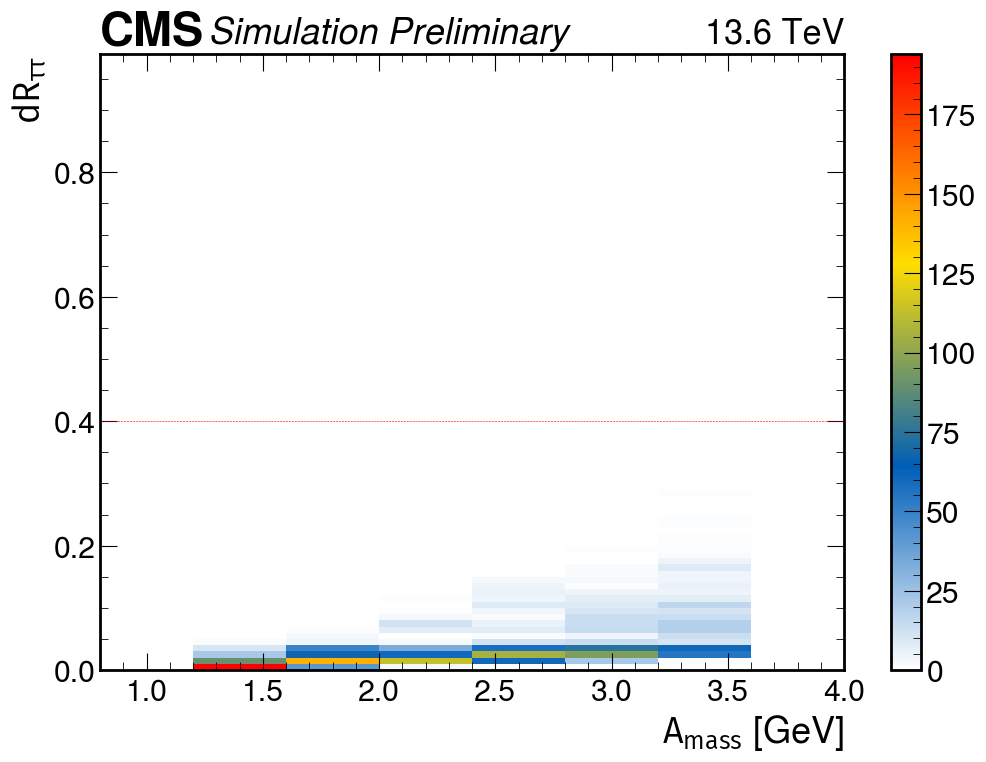

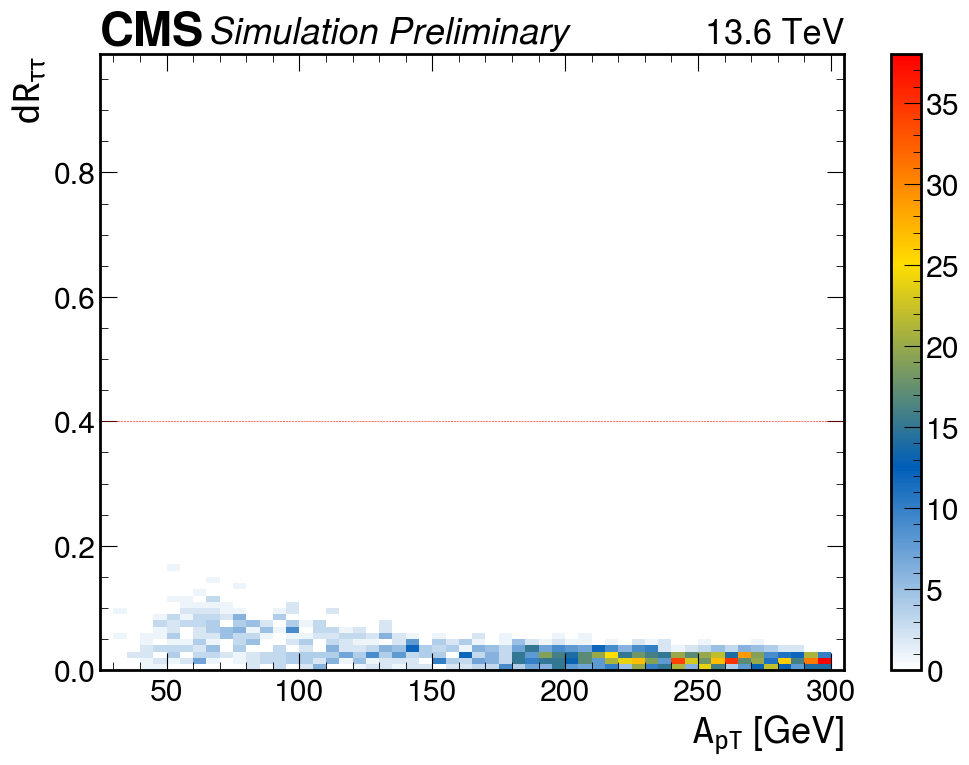

In [23]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_pt, dR_Tau1_Tau2, bins=[np.arange(25,306, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

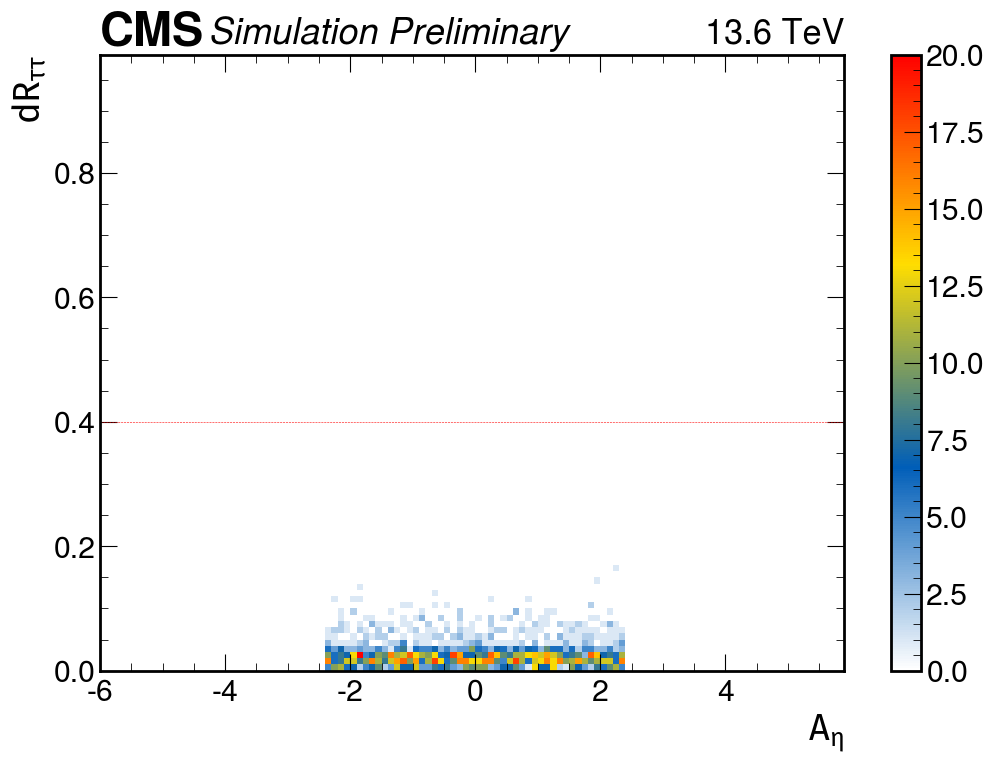

In [14]:
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_eta, dR_Tau1_Tau2, bins=[np.arange(-6,6, .1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{\eta}}$')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

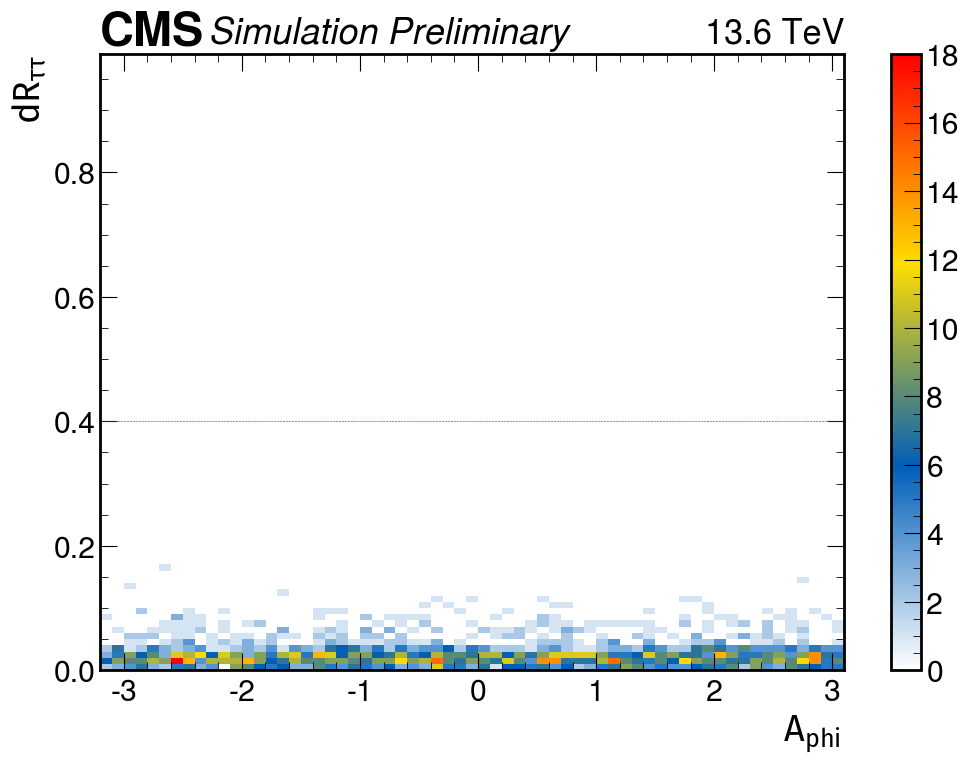

In [15]:
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(A1_phi, dR_Tau1_Tau2, bins=[np.arange(-3.2,3.2, .1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{phi}}$ ')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

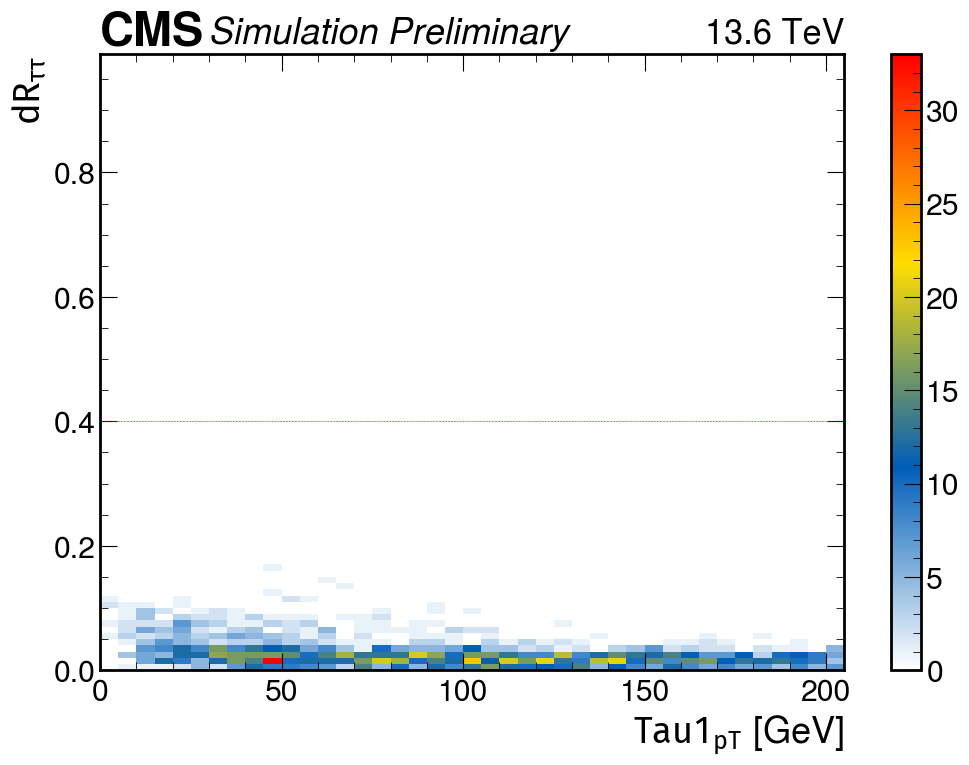

In [16]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_pt, dR_Tau1_Tau2, bins=[np.arange(0,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

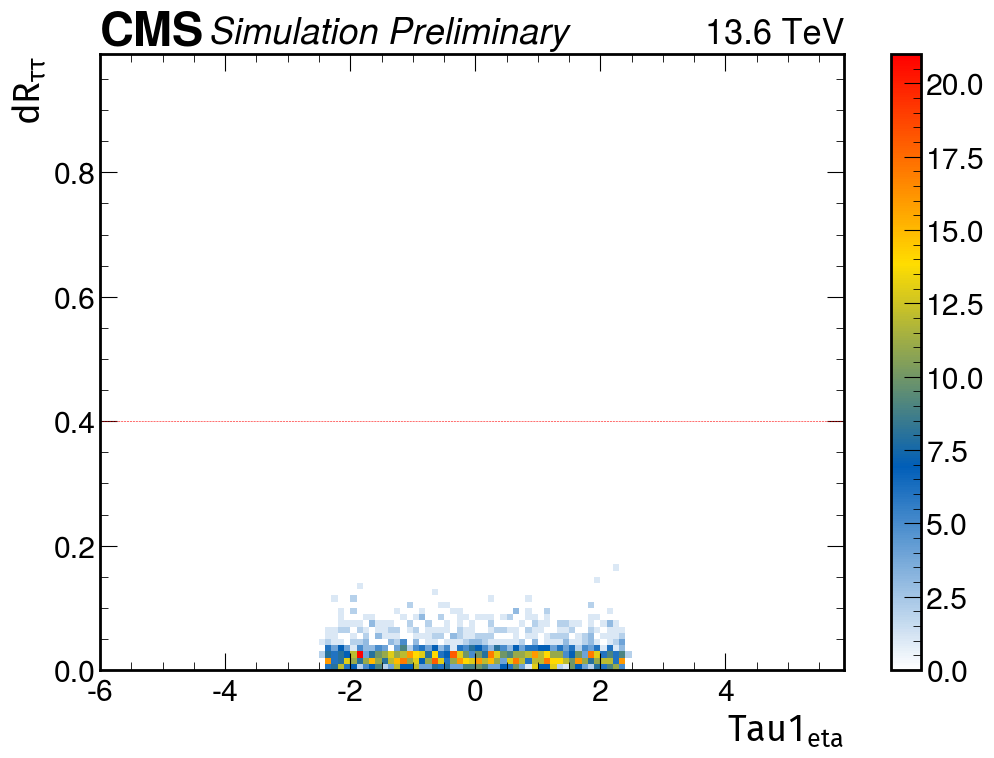

In [17]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_eta, dR_Tau1_Tau2, bins=[np.arange(-6,6, 0.1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{eta}}$')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

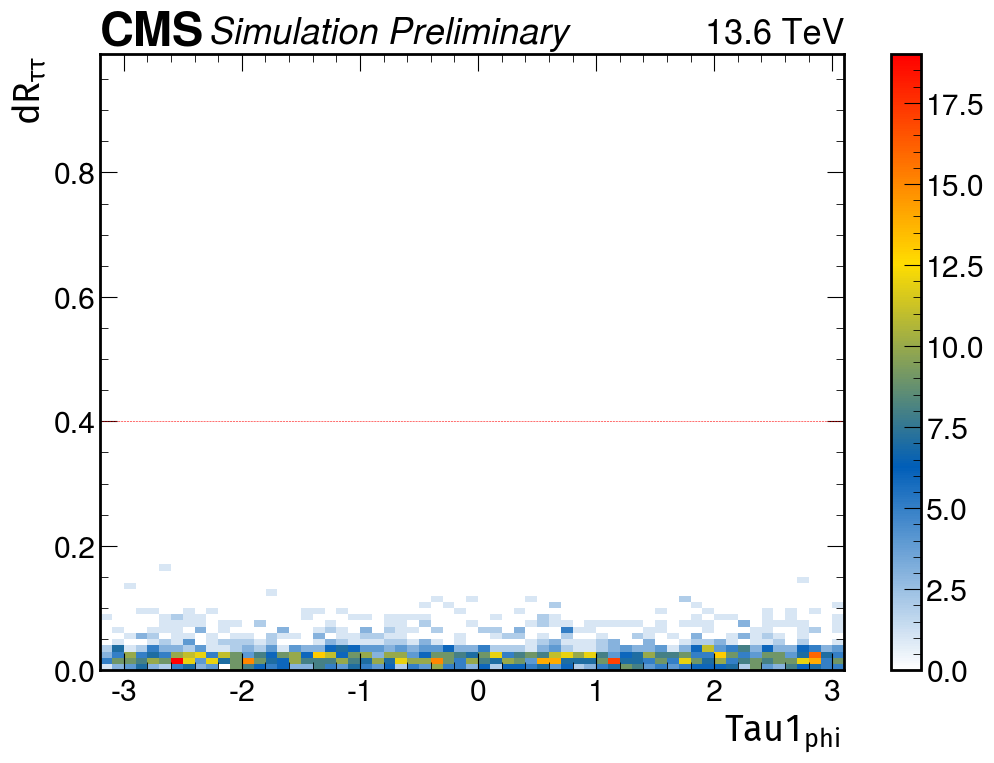

In [18]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau1_phi, dR_Tau1_Tau2, bins=[np.arange(-3.2,3.2, 0.1), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau1_{phi}}$ ')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$ ')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 

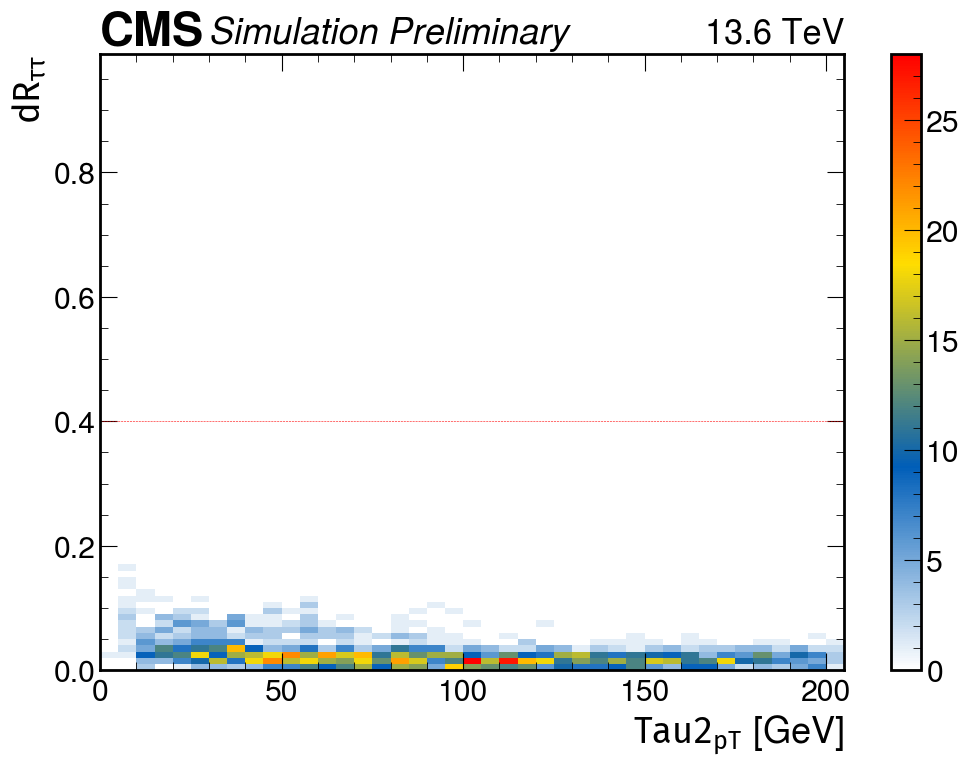

In [19]:
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
plt.hist2d(Tau2_pt, dR_Tau1_Tau2, bins=[np.arange(0,206, 5), np.arange(0,1,0.01)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{Tau2_{pT}}$ [GeV]')
plt.ylabel(r'$\mathrm{dR_{\tau\tau}}$')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

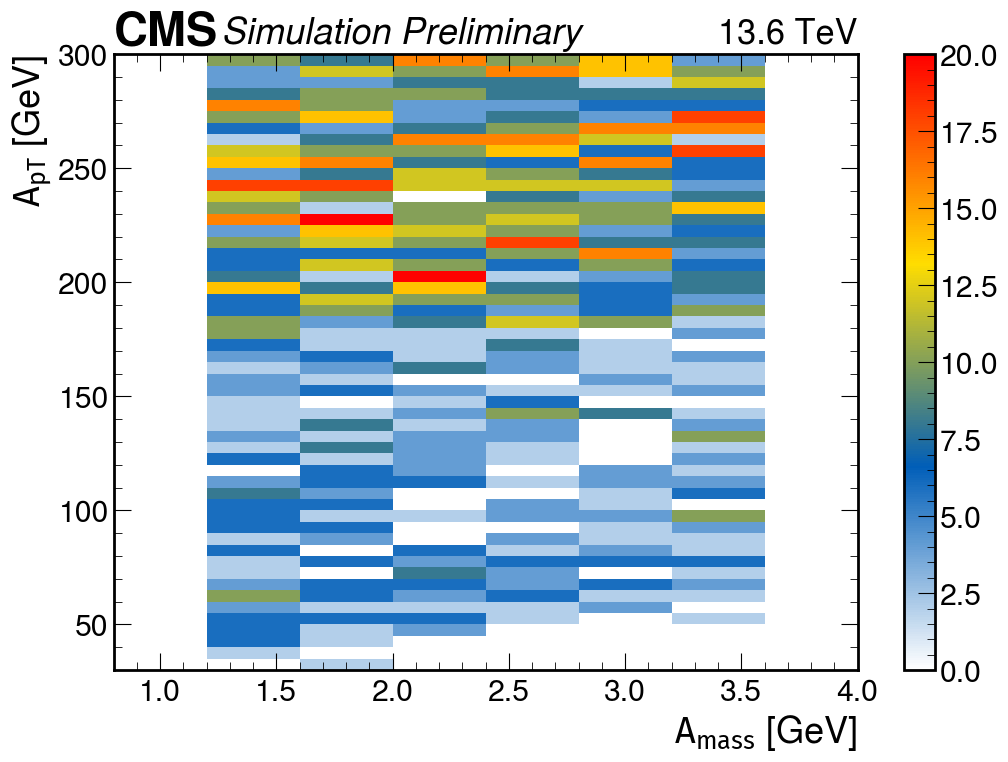

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  6.  6.  6.  4. 10.  4.  2.  2.  6.  2.  6.  6.  6.  8.  4.  0.
   6.  2.  4.  2.  2.  2.  4.  4.  2.  4.  6. 10. 10.  6.  6. 14.  8.  6.
   6. 10.  4. 16. 10. 12. 18.  4. 14. 12.  2.  6. 10. 16.  8.  4.  4. 10.]
 [ 2.  0.  2.  2.  6.  2.  6.  6.  0.  6.  0.  4.  6.  2.  6.  4.  6.  6.
   2.  8.  2.  8.  2.  0.  6.  2.  4.  6.  2.  2.  4. 10. 12.  8.  2. 12.
   6. 12. 14. 20.  2. 10. 18.  8. 16. 10.  8.  4. 14. 10. 10.  4. 12.  8.]
 [ 0.  0.  0.  4.  6.  2.  4.  6.  8.  4.  6.  0.  0.  2.  0.  0.  6.  4.
   4.  4.  4.  2.  4.  2.  4.  0.  8.  2.  2.  2.  8.  6. 10. 14. 20. 10.
   6. 10. 12. 10. 10.  0. 12. 12.  8. 10. 16.  8.  4.  4. 10.  8. 10. 16.]
 [ 0.  0.  0.  0.  2.  2.  6.  4.  4.  6.  2.  4.  0.  4.  4.  0.  2.  0.
   2.  2.  4.  4. 10.  6.  2.  0. 

In [20]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']

fig, ax = plt.subplots(figsize=(12,8), dpi=100)
# norm = mcolors.TwoSlopeNorm(vmin=500, vmax = 4000, vcenter=2000)
counts, xedges, yedges, _ = plt.hist2d(GenA1, A1_pt, bins=[np.arange(0.8,4.1, .4), np.arange(30,301,5)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{mass}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{pT}}$ [GeV]')
plt.colorbar().set_label(label='' )
plt.axhline(y=0.4, color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13.6 TeV", loc=0, ax=ax)
# plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show() 
print(counts)